![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Metaheurísticas

## Busca Tabu

### Professor: Felipe Reis


---
### Informações Iniciais

O presente tutorial tem como objetivo estudar os seguintes algoritmos:

* Busca Tabu

Para estudo desse algoritmo, recomenda-se o conhecimento nos algoritmos Hill Climbing e Steepest Ascent Hill Climbing.

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:

* LUKE, Sean. **Essentials of Metaheuristics (Second Edition).**. 2013. Lulu. Disponível em: https://cs.gmu.edu/~sean/book/metaheuristics/.

* LUZIA, L. F. and Rodrigues, M. C. **Estudo sobre as metaheurísticas**. 2009. Disponível em: https://www.ime.usp.br/~gold/cursos/2009/mac5758/LeandroMauricioHeuristica.pdf.

* BROWNLEE, Jason. **Stochastic Hill Climbing in Python from Scratch.**. 2020. Disponível em: https://machinelearningmastery.com/stochastic-hill-climbing-in-python-from-scratch/

* DE HANN, Hein. **How to Implement the Hill Climbing Algorithm in Python**. 2020. Disponível em: https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de

### Importação de bibliotecas 

In [2]:
import numpy as np
import numpy.random as rd
import operator 
import matplotlib.pyplot as plt

import plot             #código plot.py (plota gráficos)

---
## Busca Tabu

### Steepest Ascent Hill Climbing

Conforme indicado na aula teórica, a Busca Tabu pode ser implementada como uma variação do algoritmo Steepest Ascente Hill Climbing.

Para relembrarmos o algoritmo, vamos verificar os algoritmos abaixo, utilizados para encontrar o mínimo de funções.

*Obs.: O algoritmo de Steepest Ascente Hill Climbing para uma função de uma variável (x, gerando um gráfico 2d) não faz muito sentido (desempenho semelhante ao Hill Climbing convencional). Porém, o algoritmo foi implementado abaixo  apenas para facilitar o entendimento da versão de duas variáveis ((x, y), que gera um gráfico 3d).*

In [3]:
def steepest_hill_climbing(f_objetivo, intervalo, iteracoes=1000, amostras=10, 
                           step_size=0.1, op=operator.le, save=True):
    all_values = []
    
    #gera um valor aletório como primeira solução
    best_value = rd.uniform(intervalo[0], intervalo[1])
    
    if(save):
        all_values.append(best_value)
    
    # run the hill climb
    for i in range(iteracoes):
        candidate = best_value + (rd.uniform(-1, 1) * step_size)
        
        #steepest ascent
        for j in range(amostras):
            steep_cand = best_value + (rd.uniform(-1, 1) * step_size)
        
            if(op(f_objetivo(steep_cand), f_objetivo(candidate))):
                candidate = steep_cand
        
        # verifica se o ponto atual é melhor que o anterior 
        if(op(f_objetivo(candidate), f_objetivo(best_value))):
            best_value = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best_value, f_objetivo(best_value), all_values

In [4]:
def steepest_hill_climbing_3d(f_objetivo, intervalo, iteracoes=1000, 
                              amostras=10, step_size=0.1, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    best = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    
    if(save):
        all_values.append(best)
    
    # run the hill climb
    for i in range(iteracoes):
        c1 = best[0] + (rd.uniform(-1, 1) * step_size)
        c2 = best[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
        
        for j in range(amostras):
            sc1 = best[0] + (rd.uniform(-1, 1) * step_size)
            sc2 = best[1] + (rd.uniform(-1, 1) * step_size)
            steep_cand = [sc1, sc2]
        
            if(op(f_objetivo(steep_cand[0], steep_cand[1]), f_objetivo(candidate[0], candidate[1]))):
                candidate = steep_cand
                
        # verifica se o ponto atual é melhor que o anterior 
        if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
            best = candidate
            
        if(save):
            all_values.append(candidate)
            
    return best, f_objetivo(best[0], best[1]), all_values

### Estudo de Funções

Durante a aula de Hill Climbing, fizemos um estudo detalhado de algumas funções em 3 dimensões.

As mesmas funções estão implementadas abaixo, para que possamos utilizar ela na implementação da Busca Tabu. 

In [ ]:
#funções 3d

def f_prb5v1(x, y):
    return -(x**2) - (y**2)

def f_prb5v2(x, y):
    #return -(8*(x**2)) - (2*(y**2))
    return -(2*(x**2)) - (20*x) - (2*(y**2)) + (10*y)

def f_prb5v3(x, y):
    return (2*(x**2)) - (2*(y**2))

def f_prb5v4(x, y):
    return -(2*(x**3)) + (2*(x**2)) - (2*(y**3)) + (2*(y**2))
    #return -(2*(x**4)) + (4*(x**3)) - (5*(y**4)) + (5*(y**2))
    
def f_prb5v5(x, y):
    #return np.sin(x**2 + y**2) / ((2*(x**2)) + (y**2))
    return np.sin(np.power(x,2) + np.power(y,2)) / ((2*np.power(x,2)) + np.power(y,2))

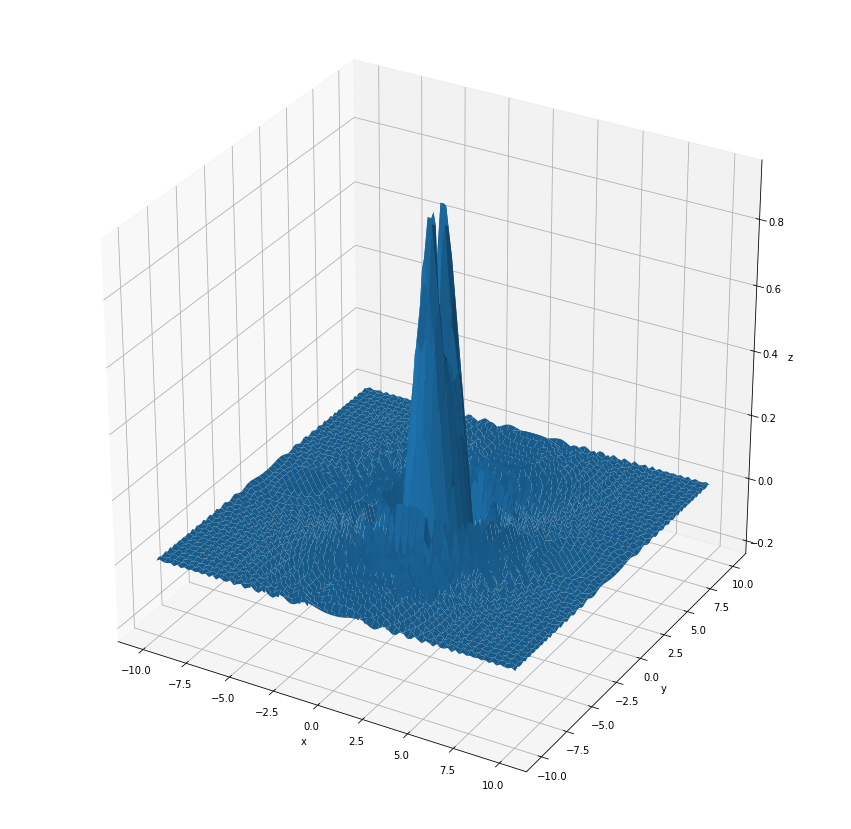

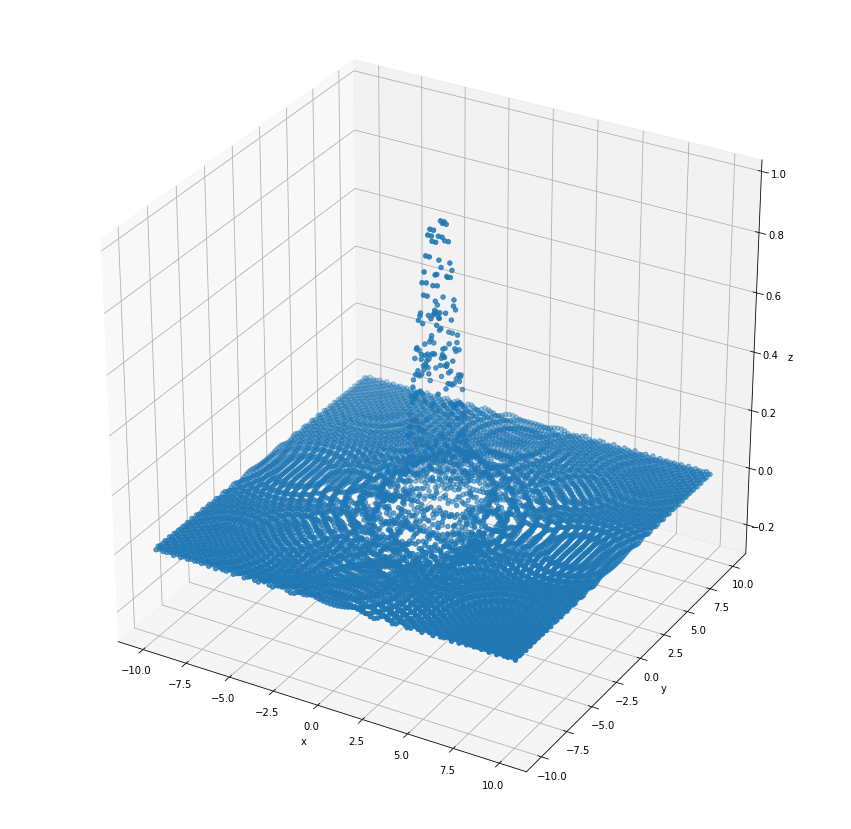

In [5]:
plot.plot_3d(f_prb5v5, interval=10, type='surface')
plot.plot_3d(f_prb5v5, interval=10, type='scatter')

---
### Lista Tabu

Podemos implementar uma lista com um número máximo de elementos. 

A Lista Tabu foi implementada por meio de herança da classe 'list', nativa do Python.

No método append, foi adicionada uma validação que remove os elementos mais antigos, caso a lista tenha um tamanho superior ao máximo permitido.

In [7]:
class ListaTabu(list):
    def __init__(self, tamanho):
        self.tamanho = tamanho
    
    def setTamanho(self, tamanho):
        self.tamanho = tamanho
        
    def getTamanho(self):
        return self.tamanho
    
    def append(self, value):
        super(ListaTabu, self).append(value)
        
        if(len(self) > self.tamanho):
            self.pop(0)
    
    def extend(self, value):
        super(ListaTabu, self).extend(value)
        
        while(len(self) > self.tamanho):
            self.pop(0)
    
    def insert(self, pos, value):
        super(ListaTabu, self).insert(pos, value)
        
        if(len(self) > self.tamanho):
            self.pop(1 if pos == 0 else 0)

Podemos ver o comportamento da Lista Tabu nos blocos abaixo.

In [10]:
lista = [] #list()
listaTabu = ListaTabu(tamanho=5)
for i in range(0, 10):
    lista.append(i)
    listaTabu.append(i)

print(lista)
print(listaTabu)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


In [13]:
if(10 in listaTabu):
    print('Teste')

In [14]:
listaTabu.pop()
listaTabu.pop()
listaTabu.append(10)
listaTabu.insert(0, 10)
print(listaTabu)

[10, 5, 6, 7, 10]


In [9]:
listaTabu.extend([20, 30, 40])
print(listaTabu)

[7, 10, 20, 30, 40]


In [10]:
listaTabu.setTamanho(10)
listaTabu.extend([20, 30, 40])
print(listaTabu)

[7, 10, 20, 30, 40, 20, 30, 40]


---
### Algoritmo Busca Tabu

In [15]:
def busca_tabu(f_objetivo, lista_tabu, intervalo, iteracoes=1000, 
               amostras=10, step_size=0.1, op=operator.le, save=True):        
    all_values = []
    
    #gera um valor aletório como primeira solução
    atual = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    best = atual.copy()
    
    if(save):
        all_values.append(best)
        lista_tabu.append(best)
    
    # run the hill climb
    for i in range(iteracoes):
        c1 = atual[0] + (rd.uniform(-1, 1) * step_size)
        c2 = atual[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
        
        for j in range(amostras):
            sc1 = atual[0] + (rd.uniform(-1, 1) * step_size)
            sc2 = atual[1] + (rd.uniform(-1, 1) * step_size)
            steep_cand = [sc1, sc2]
        
            #somente permite a solução candidata, se a mesma não estiver na Lista Tabu
            if(steep_cand not in lista_tabu):
                if(op(f_objetivo(steep_cand[0], steep_cand[1]), f_objetivo(candidate[0], candidate[1]))):
                    candidate = steep_cand
            else:
                print('In list')
                
        # verifica se o ponto atual é melhor que o anterior 
        if(candidate not in lista_tabu):
            lista_tabu.append(candidate)
            atual = candidate
            if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
                best = candidate.copy()
        else:
            print('Na lista')
            
        if(save):
            all_values.append(candidate)
            
    print(len(lista_tabu))
            
    return best, f_objetivo(best[0], best[1]), all_values

---
## Busca Tabu

### Problema 1: Busca Tabu com função de 3 dimensões

O máximo de uma função de segundo grau será obtido pelo algoritmo de Busca Tabu.

Primeiramente vamos olhar o comportamento do Hill Climbing em uma função de 2 variáveis.

In [17]:
def imprimeMelhor(result):
    best, score, values = result
    
    #imprime resultados
    print('Best: f(%s) = %f' % (best, score))
    
    #plota gráfico
    x = [i[0] for i in values]
    y = [i[1] for i in values]
    plot.plot_3d(f_prb5v5, x=x, y=y, type='scatter')

Best: f([-0.022566054215949607, 9.123454571097911]) = 0.012012


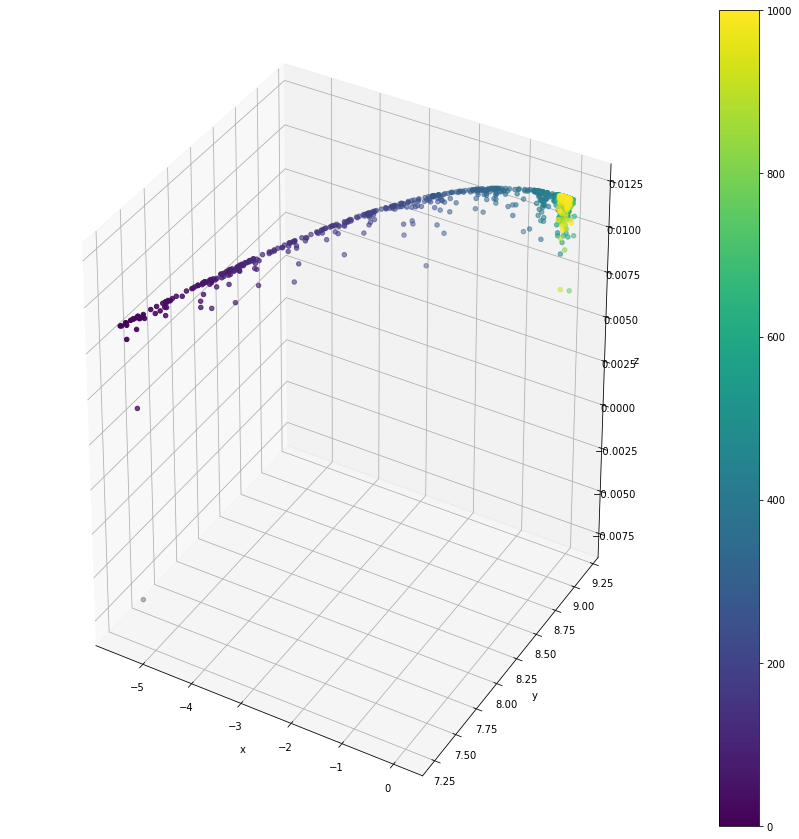

In [21]:
np.random.seed(5) #8
result = steepest_hill_climbing_3d(f_objetivo=f_prb5v5, intervalo=[-10, 10], iteracoes=1000, 
                                   amostras=10, step_size=0.1, op=operator.ge)

imprimeMelhor(result)

#### Implementação da Busca Tabu

50
Best: f([-0.8839593874406158, 6.699069927389712]) = 0.021413


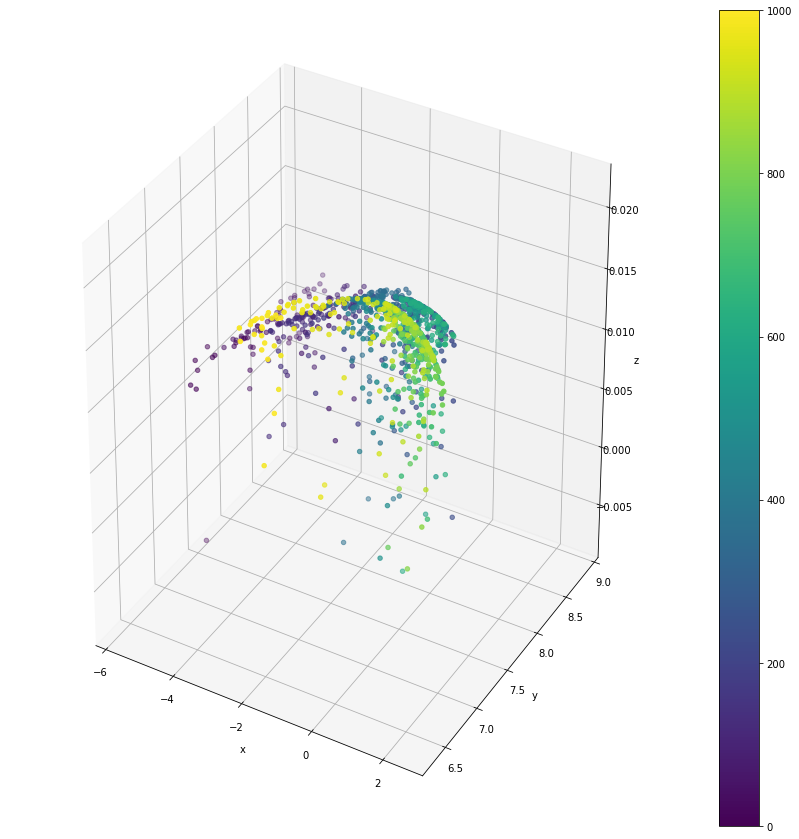

In [24]:
np.random.seed(5) #8

# execução da busca tabu
iteracoes = 1000
lista_tabu = ListaTabu(int(0.05*iteracoes))

result = busca_tabu(f_objetivo=f_prb5v5, lista_tabu=lista_tabu, intervalo=[-10, 10], 
                    iteracoes=iteracoes, amostras=10, step_size=0.3, op=operator.ge)

#imprime resultados
imprimeMelhor(result)

Conforme pudemos perceber na implementação, caso tenhamos um valor contínuo (real), a implementação da Lista Tabu pode não causar nenhum benefício em relação ao Steepest Ascent Hill Climbing. Tal característica é descrita por (Luke, 2013), conforme citado nos slides de aula.

Para que a Lista Tabu tenha efetividade em um problema contínuo, temos que promover uma alteração na mesma, para que ela utilize uma margem, onde valores próximos serão considerados iguais.

In [25]:
class ListaTabuComMargem(ListaTabu):
    def __init__(self, tamanho, margem=0):
        self.tamanho = tamanho
        self.margem = margem
        
    def __contains__(self, key):
        for i in range(0, len(self)):
            if(abs(self[i] - key) <= self.margem):
                return True
        return False

In [27]:
class ListaTabuComMargemEuclidiana(ListaTabu):
    def __init__(self, tamanho, margem=0):
        self.tamanho = tamanho
        self.margem = margem
    
    def __f_calc_dist_euclidiana(self, x1, x2, y1, y2):
        return (((x1 - x2)**2) + ((y1 - y2)**2))**0.5
    
    def __contains__(self, key):
        for i in range(0, len(self)):
            if(self.__f_calc_dist_euclidiana(self[i][0], key[0], self[i][1], key[1]) <= self.margem):
                return True
        return False

In list
In list
50
Best: f([0.09033156332676404, 7.1982236704153495]) = 0.019292


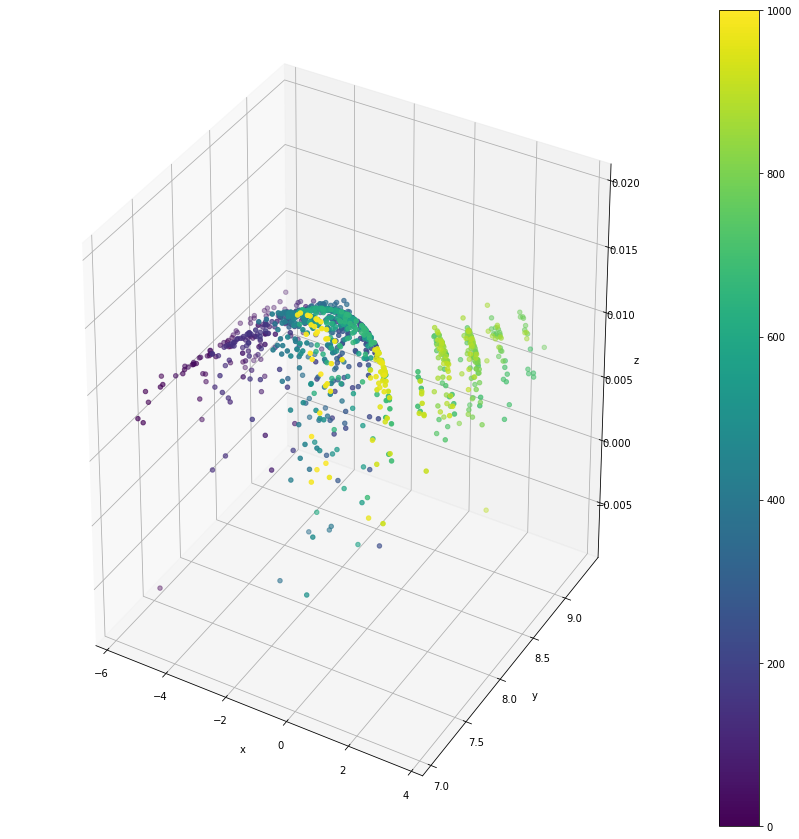

In [33]:
np.random.seed(5) #8

# execução do  hill climbing search
iteracoes = 1000
lista_tabu = ListaTabuComMargemEuclidiana(int(0.05*iteracoes), margem=0.001)

result = busca_tabu(f_objetivo=f_prb5v5, lista_tabu=lista_tabu, intervalo=[-10, 10], 
                    iteracoes=iteracoes, amostras=10, step_size=0.3, op=operator.ge)

#imprime resultados
imprimeMelhor(result)

In list
In list
In list
In list
In list
25
Best: f([-0.018845433546553214, 2.779562098955049]) = 0.128369


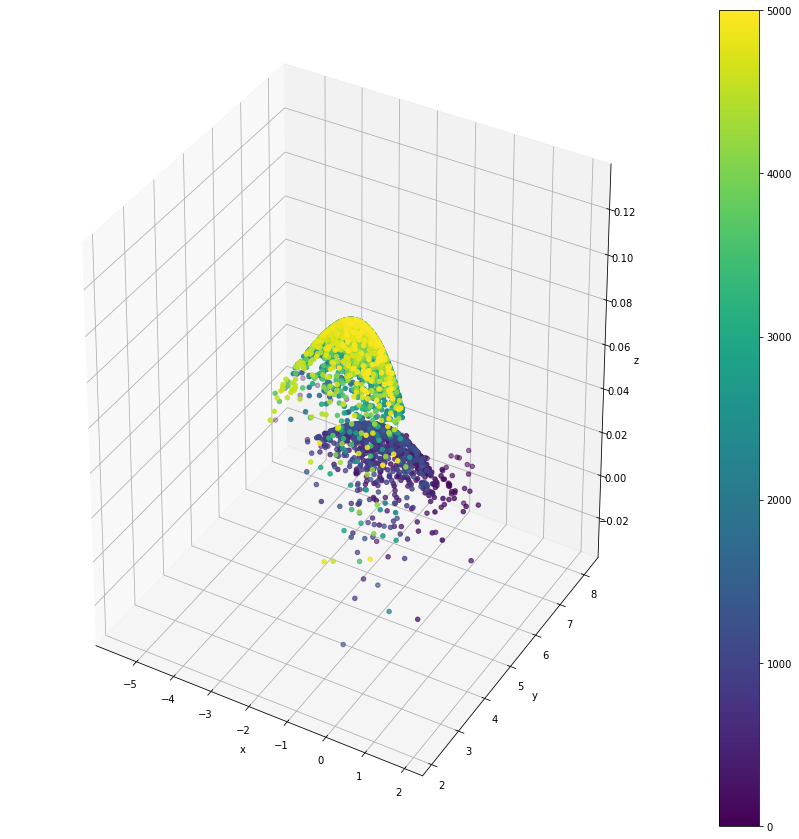

In [37]:
np.random.seed(5) #8

# execução do  hill climbing search
iteracoes = 5000
lista_tabu = ListaTabuComMargemEuclidiana(int(0.005*iteracoes), margem=0.001)

result = busca_tabu(f_objetivo=f_prb5v5, lista_tabu=lista_tabu, intervalo=[-10, 10], 
                    iteracoes=iteracoes, amostras=10, step_size=0.5, op=operator.ge)

#imprime resultados
imprimeMelhor(result)

### Busca Tabu com Diversificação

In [ ]:
def busca_tabu(f_objetivo, lista_tabu, intervalo, iteracoes=1000, 
               amostras=10, step_size=0.1, op=operator.le, save=True):        
    all_values = []
    sem_melhoria = 0
    
    #gera um valor aletório como primeira solução
    atual = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
    best = atual.copy()
    
    if(save):
        all_values.append(best)
        lista_tabu.append(best)
    
    # run the tabu search
    for i in range(iteracoes):
        c1 = atual[0] + (rd.uniform(-1, 1) * step_size)
        c2 = atual[1] + (rd.uniform(-1, 1) * step_size)
        candidate = [c1, c2]
        
        for j in range(amostras):
            sc1 = atual[0] + (rd.uniform(-1, 1) * step_size)
            sc2 = atual[1] + (rd.uniform(-1, 1) * step_size)
            steep_cand = [sc1, sc2]
        
            #somente permite a solução candidata, se a mesma não estiver na Lista Tabu
            if(steep_cand not in lista_tabu):
                if(op(f_objetivo(steep_cand[0], steep_cand[1]), f_objetivo(candidate[0], candidate[1]))):
                    candidate = steep_cand
            else:
                print('In list')
                
        # verifica se o ponto atual é melhor que o anterior 
        if(candidate not in lista_tabu):
            lista_tabu.append(candidate)
            atual = candidate
            if(op(f_objetivo(candidate[0], candidate[1]), f_objetivo(best[0], best[1]))):
                best = candidate.copy()
                sem_melhoria = 0
        else:
            print('Na lista')
            
        if(save):
            all_values.append(candidate)
            
        #diversificação
        sem_melhoria += 1
        
        if(sem_melhoria >= 50):
            atual = [rd.uniform(intervalo[0], intervalo[1]), rd.uniform(intervalo[0], intervalo[1])]
            
    print(len(lista_tabu))
            
    return best, f_objetivo(best[0], best[1]), all_values